<a href="https://colab.research.google.com/github/Carl1988A/Bootstrap-method-in-Python/blob/master/Bootstrap_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applying Bootstrap Sampling for machine learning**


The objective is to show is a way to build an empirical confidence interval in a machine learning project using Python.

In inferential statistcs, confidence intervals play a major role when it comes to estimate the parameters of a population. Here is no different, using bootstrap, we can calculate a robust confidence interval and infer, for instance, that our model skill have a 95% likelihood of classification accuracy between 65% to 75%.  

So, let's start things off.



In [0]:
# Framework loading
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Data loading
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url)
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
#Check dataset shape
df.shape

(767, 9)

In [0]:
# Applying column names
# The column names can be found at: https://www.kaggle.com/uciml/pima-indians-diabetes-database

columns =['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']

df.columns = columns

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
# Checking whether or not the dataset carries null values
print("Null observations : \n\n",df.isnull().sum())

Null observations : 

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


In [0]:
# Applying Standardization
# As the whole data set is being used to bootstrapping ,I'm not using StandardScaler.fit() function on the data to avoiding data knowledge leakage.
# If I did, the distribution pattern would be the same for train/test splits, hence,the test data would be biased and then, the model would predict
# over biased data as well.
df_std = df.iloc[:,:-1]
normalized_df=(df_std-df_std.mean())/df_std.std()

In [8]:
# Gathering target value into the dataset

standard_df = pd.DataFrame(normalized_df)
standard_df['class'] = df['Class']
standard_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,-0.843176,-1.121354,-0.160144,0.531677,-0.693107,-0.683283,-0.364027,-0.188817,0
1,1.233435,1.943208,-0.263406,-1.286043,-0.693107,-1.101582,0.604306,-0.103727,1
2,-0.843176,-0.996270,-0.160144,0.155597,0.122277,-0.493147,-0.919084,-1.039715,0
3,-1.139835,0.504740,-1.502554,0.907756,0.764175,1.408213,5.479157,-0.018638,1
4,0.343459,-0.151952,0.252905,-1.286043,-0.693107,-0.810040,-0.816519,-0.273907,0


In [10]:
# Transforming dataset as an array
values_array = standard_df.values
type(values_array)

numpy.ndarray

In [0]:
# Set bootstrap iterations and size
n_iterations = 1500
n_size = int(len(standard_df))


In [12]:
stats = list()
for i in range (n_iterations):
    # prepare train and test sets for bootstrap sampling with replacement
    train = resample(values_array, n_samples= n_size)
    test = np.array([x for x in values_array if x.tolist() not in train.tolist() ])
   
# fit model
    model = DecisionTreeClassifier(random_state = 101)
    model.fit(train[:,:-1], train[:,-1])
# evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    stats.append(score)

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

# Print confidence interval
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 64.4% and 74.4%


In [13]:
# Checking Decision Tree accuracy score 
result = pd.DataFrame(stats)
result = result.mean()*100
print(" Decision Tree accuracy score using bootstrap sampling: %.2f" % result)


 Decision Tree accuracy score using bootstrap sampling: 69.29


As we can see bellow, we could build a confidence interval, showing that there is a 95% likelihood that the interval covers the true skill of the model.

Other interesting point is that the results show a Gaussian-like distribution.

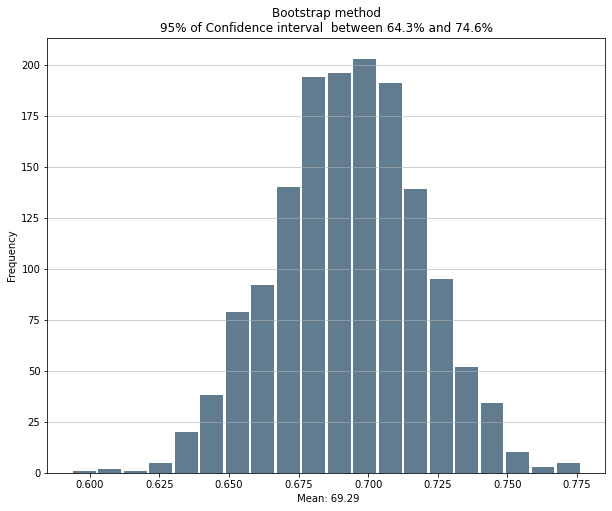

In [15]:
# Let's plot a Histogram to check the probability distribution

plt.figure(figsize=(10,8)) 
plt.hist(stats, bins = 20,rwidth=0.9, color='#607c8e')
plt.title('Bootstrap method\n95% of Confidence interval  between 64.3% and 74.6%')
plt.xlabel(" Mean: %.2f" % result)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

